
# This notebook is based the python module **Diffractio** 
### see  https://diffractio.readthedocs.io/en/latest/ and https://bitbucket.org/optbrea/diffractio/src/master/docs/readme.rst?mode=view

by Luis Miguel Sanchez Brea <optbrea@ucm.es>

Universidad Complutense de Madrid, Faculty of Physical Sciences, Department of Optics Plaza de las ciencias 1, ES-28040 Madrid (Spain)

# The notebook uses Diffractio as a design tool for diffraction gratings for Grating magneto-optical traps GMOTS see:- http://dx.doi.org/10.1038/Nnano.2013.47


Author 
Charlie Ironside
Department of Physics and Astronomy,
Curtin University
https://staffportal.curtin.edu.au/staff/profile/view/Charlie.Ironside/

Charlie.ironside@curtin.edu.au

Sept 2020.

It is written on Google's Colab platform
https://colab.research.google.com/notebooks/intro.ipynb#recent=true



The first part installs the Diffractio package and additonal packages as described in :- https://diffractio.readthedocs.io/en/latest/installation.html

In [2]:

!pip install hickle
!pip install mayavi
!pip install py-pol
!pip install diffractio

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

number of processors: 2


Mask for:-

9.15.3. binary grating: amplitude and phase
https://diffractio.readthedocs.io/en/latest/source/tutorial/scalar_X/masks_x.html#binary-grating:-amplitude-and-phase

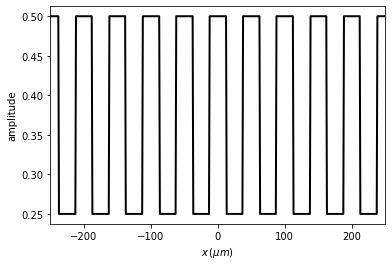

In [ ]:
x = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.399 * um
red = Scalar_mask_X(x, wavelength)
red.binary_grating(
    period=50 * um,
    amin=0.25,
    amax=0.5,
    phase=np.pi,
    x0=0 * um,
    fill_factor=0.5)
red.draw(kind='amplitude')

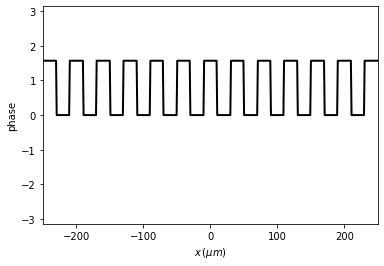

In [ ]:
x = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.399 * um
period = 40 * um
red = Scalar_mask_X(x, wavelength)
red.binary_grating(
    period=period,
    amin=1,
    amax=1,
    phase=np.pi / 2,
    x0=0,
    fill_factor=0.5)
red.draw(kind='phase')

Light source a Gaussian beam

https://diffractio.readthedocs.io/en/latest/source/tutorial/scalar_X/sources_x.html#Gauss-beam

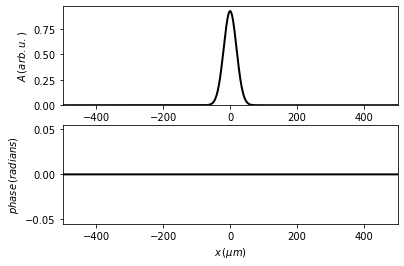

In [ ]:
x0 = np.linspace(-500 * um, 500 * um, 2048)
wavelength = .399 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(
    A=1, x0=0 * um, z0=-2000 * um, w0=25 * um, theta=0 * degrees)

u0.draw(kind='field')

Propagate XZ

https://diffractio.readthedocs.io/en/latest/usage.html

https://diffractio.readthedocs.io/en/latest/source/tutorial/scalar_XZ/masks_xz.html#xz-mask-from-a-x-mask:-constant-refraction-index

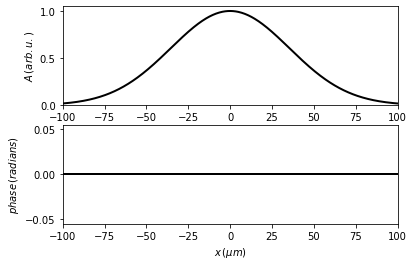

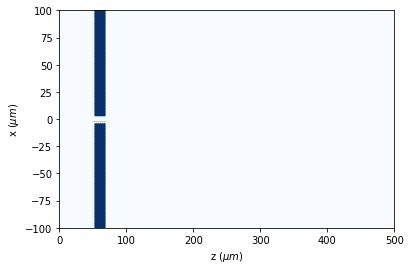

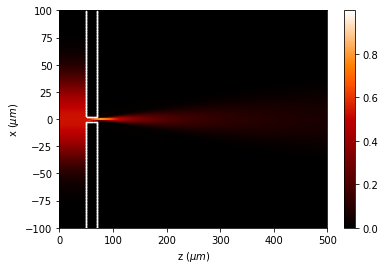

In [ ]:
from diffractio import um, nm, mm, np,degrees
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 500 * um, 512)
wavelength = 0.399 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(
    A=1, x0=0 * um, z0=0 * um, w0=50 * um, theta=0 * degrees)
u0.draw(kind='field', filename='xz_source.png')
t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.incident_field(u0)
t1.slit(
    r0=(0 * um, 50 * um),
    aperture=5 * um,
    depth=20 * um,
    refraction_index=1.5 + 1j,
    refraction_index_center='',
    angle=0 * degrees)

t1.draw_refraction_index();
t1.BPM(verbose=False)
t1.draw(logarithm=1, normalize='maximum', draw_borders=True,colorbar_kind='vertical')

https://diffractio.readthedocs.io/en/latest/source/tutorial/scalar_XZ/masks_xz.html#Ronchi-grating

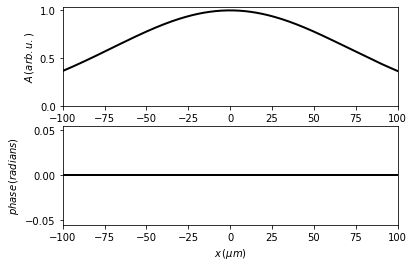

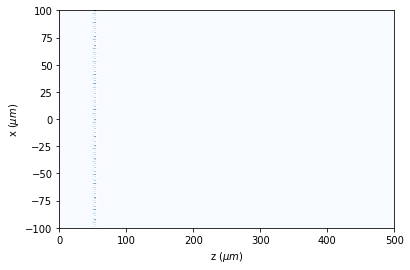

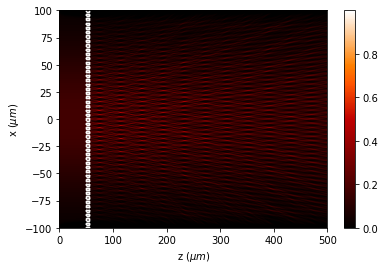

In [ ]:
from diffractio import um, nm, mm, np,degrees
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 500 * um, 512)
wavelength = 0.399 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(
    A=1, x0=0 * um, z0=0 * um, w0=100 * um, theta=0 * degrees)
u0.draw(kind='field', filename='xz_source.png')
t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.incident_field(u0)
t1.ronchi_grating(
    period=4 * um,
    fill_factor=.5,
    length=500 * um,
    height=5.0 * um,
    r0=(0 * um, 50 * um),
    Dx=2 * um,
    refraction_index=1.5,
    heigth_substrate=1 * um,
    refraction_index_substrate=1.0,
    angle=0 * degrees)
t1.draw_refraction_index();
t1.BPM()
t1.draw(logarithm=False, normalize='maximum', draw_borders=True,colorbar_kind='vertical' )

In [ ]:
from diffractio import degrees, eps, mm, no_date, np, um
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY

x0 = np.linspace(-25 * um, 25 * um, 128)
y0 = np.linspace(-25 * um, 25 * um, 128)
z0 = np.linspace(100 * um, 500 * um, 256)
wavelength = .6328 * um

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(
    r0=(0 * um, 0 * um), radius=(10 * um, 10 * um), angle=0 * degrees)
t1.draw(filename='xyz_mask.png')

uxyz = Scalar_mask_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.incident_field(u0=t1)

uxyz.RS(verbose=True, num_processors=4)

uxyz.draw_XYZ(y0=0 * mm, logarithm=True, normalize='maximum',filename='xyz_cut.png')

RuntimeError: ignored

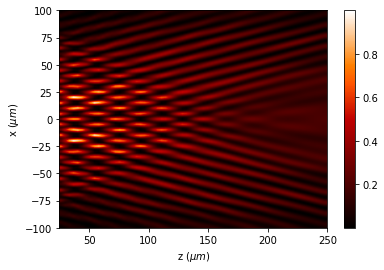

In [ ]:
filename = 'video_xz'

length = 200 * um
wavelength = 5 * um
period = 25 * um
z_talbot = 2 * period**2 / wavelength
x0 = np.linspace(-length / 2, length / 2, 256)
z0 = np.linspace(25 * um, 1 * z_talbot, 64)

u0 = Scalar_source_X(x0, wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=-100 * um, w0=100 * um, theta=0 * degrees)

t1 = Scalar_mask_X(x0, wavelength)
t1.ronchi_grating(period=10 * um, x0=0 * um, fill_factor=0.5)

u1 = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(t1 * u0)
u1.RS()

u1.draw(
    kind='intensity',
    logarithm=False,
    normalize='maximum',
    draw_borders=True,
    colorbar_kind='vertical',
    filename='');

In [ ]:
u1.video_profiles(
    kind='intensity',
    kind_profile='transversal',
    wait=0.001,
    logarithm=True,
    normalize='maximum',
    filename=filename + "_int_trans.avi")

u1.video_profiles(
    kind='intensity',
    kind_profile='longitudinal',
    wait=0.001,
    logarithm=True,
    normalize='maximum',
    filename=filename + "_int_long.avi")

u1.video_profiles(
    kind='phase',
    kind_profile='transversal',
    wait=0.001,
    logarithm=True,
    normalize='maximum',
    filename=filename + "_pha_trans.avi")